#**The Sparks Foundation**
##***Data Science and Business Analytics (GRIPJUNE'21)***

### Task 2: **Prediction using Decision Tree Algorithm**

We will create a model which will be able to predict the class of the data accordingly.

### Algorithm: **DecisionTreeClassifier**
We will Create a Decision Tree classifier and visualize it graphically.



### ***Author: Rishabh Jain***
Dataset: https://bit.ly/3kXTdox



In [111]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



### **Performing Exploratory Data Analysis (EDA)**
checking the nature of the features in data, by using Discriptive Statistics and Visualisation

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [114]:
# Discriptive Statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [115]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

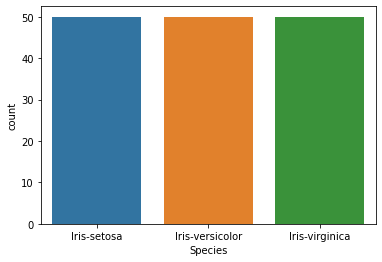

In [116]:
sns.countplot(x='Species',data=data) #Countplot in order to check the no. of raws of different classes (Species)
plt.show()

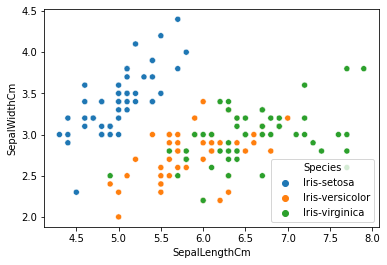

In [117]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data, hue ='Species')
plt.show()

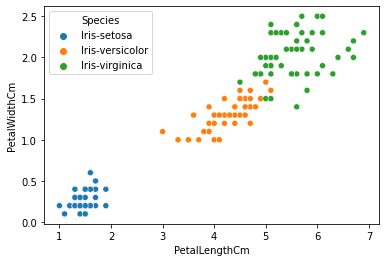

In [118]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data, hue ='Species')
plt.show()


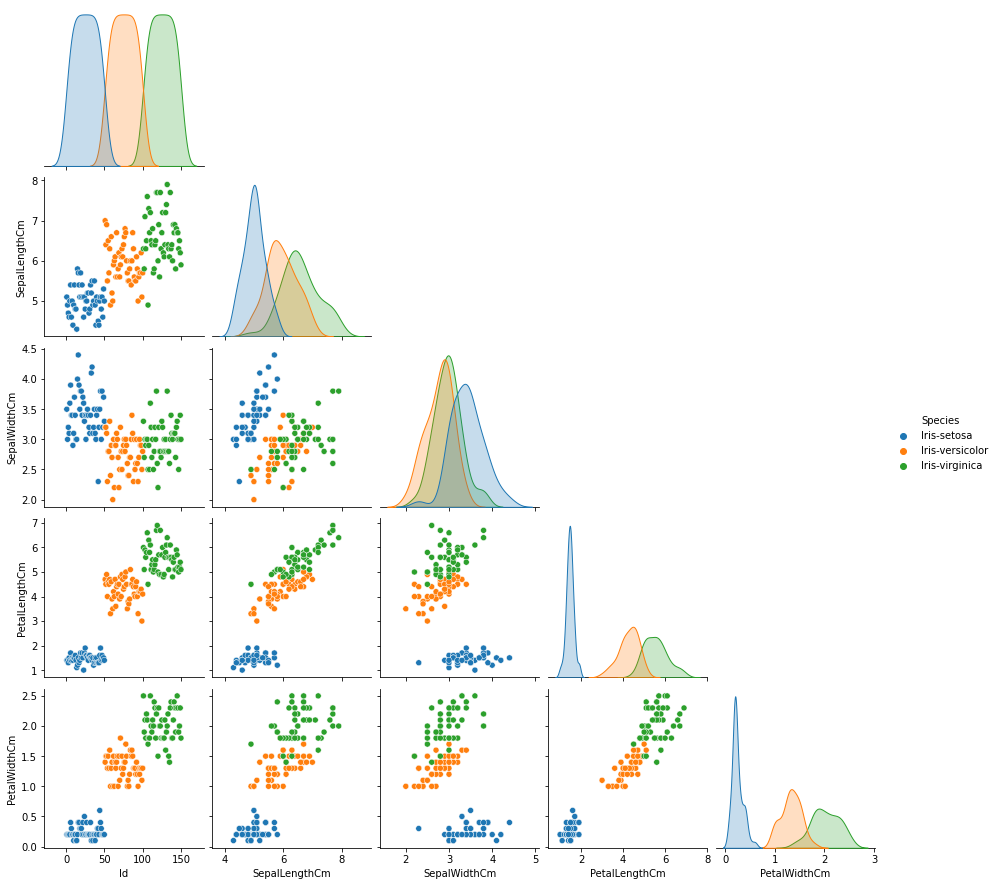

In [119]:
sns.pairplot(data, corner = True, hue='Species', diag_kind = 'kde')
plt.show()

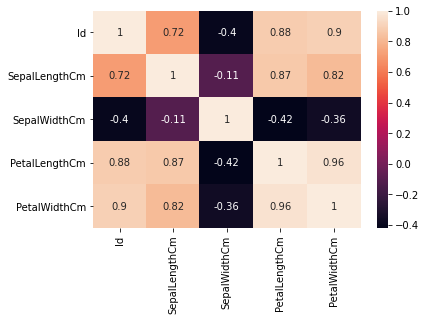

In [120]:
sns.heatmap(data.corr(), annot=True) #heatmap for pairwise correlation
plt.show()

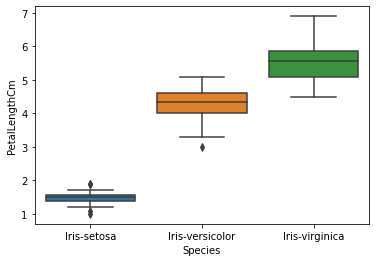

In [121]:
sns.boxplot(x='Species', y='PetalLengthCm', data=data)

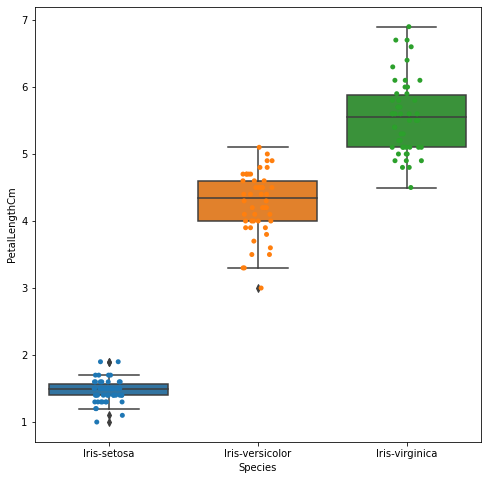

In [122]:
#using jitter so that all the points don't fall in single vertical lines above species
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x = 'Species',y = 'PetalLengthCm')
sns.stripplot(data=data, x='Species', y='PetalLengthCm', jitter=True, edgecolor='green')

## **Introducing Scikit Learn for Creating a Decision Tree Classifier**
Separate Label and Features i.e. divide the data into "features" (inputs) and "label" (output).

In [123]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [124]:
predictor_list=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [125]:
X = data[predictor_list]
y = data['Species']

In [126]:
#performing Train test split
from sklearn.model_selection import train_test_split 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Modelling the Algorithm

In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [129]:
model.fit(X_train, y_train) #fit the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction on Test data


In [130]:
y_pred = model.predict(X_test)

In [131]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [132]:
print('Actual vs Predicted')
class_res = pd.DataFrame({'y_pred':y_pred, 'y_true': y_test})
class_res

Actual vs Predicted


,y_pred,y_true
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
56,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
44,Iris-setosa,Iris-setosa
29,Iris-setosa,Iris-setosa
120,Iris-virginica,Iris-virginica


In [133]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) #Important Features

,Feature Importance
SepalLengthCm,0.007520
SepalWidthCm,0.018801
PetalLengthCm,0.075846
PetalWidthCm,0.897833


###Evaluation

In [134]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [135]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



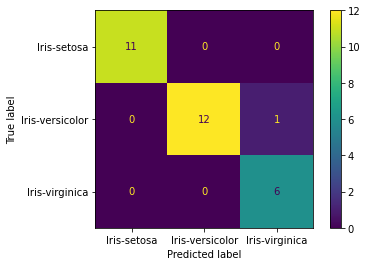

In [136]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

Visualise the tree


In [137]:
from sklearn.tree import plot_tree

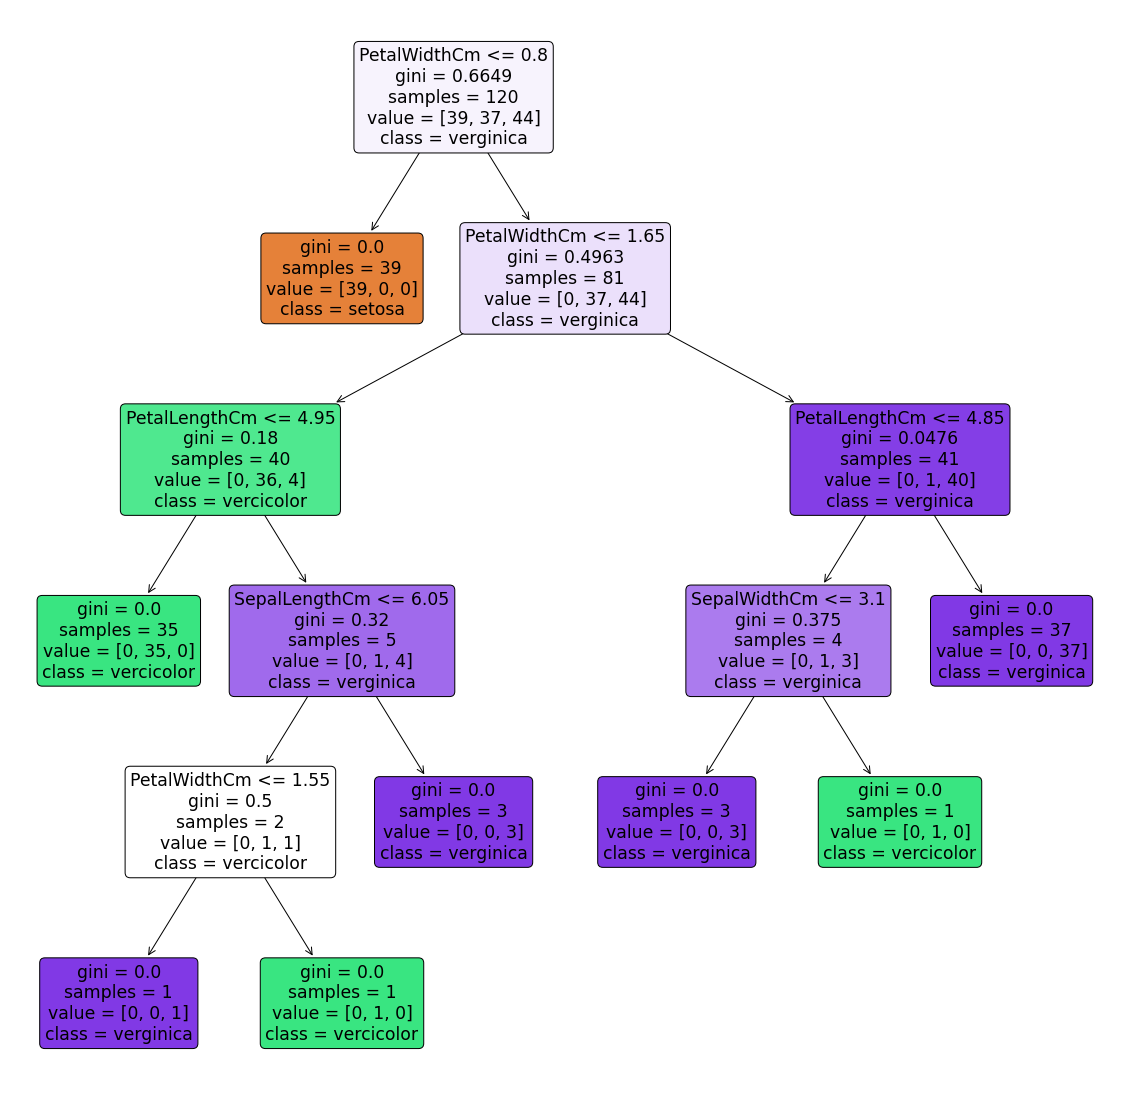

In [138]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names= X.columns,class_names =["setosa", "vercicolor", "verginica"], filled=True, precision = 4, rounded = True)
plt.show()

### Retraining the model on full data

In [139]:
model.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

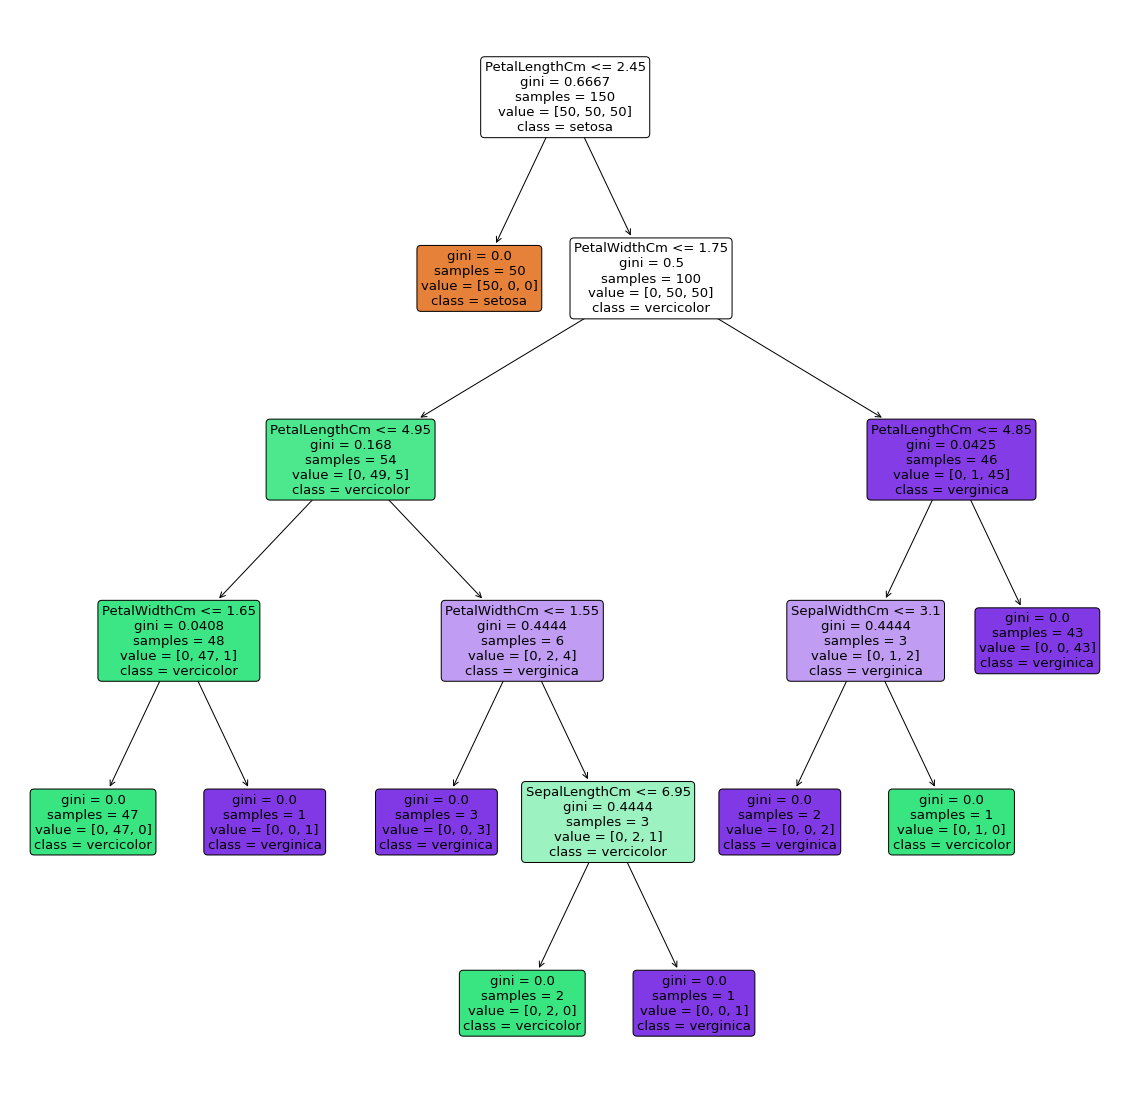

In [140]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names= X.columns,class_names =["setosa", "vercicolor", "verginica"], filled=True, precision = 4, rounded = True)
plt.show()

## Thank You!